In [136]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



## Question 9.10

In [173]:
data = pd.read_csv('Chapter  9 Data Sets/CH09PR10.txt',  header=None, sep='\s+')

In [174]:
data.rename({0:"Y", 1: "X_1", 2: "X_2", 3: "X_3", 4: "X_4"}, axis='columns', inplace=True)

In [175]:
data = data.astype(int)

In [176]:
data.head()

,Y,X_1,X_2,X_3,X_4
0,88,86,110,100,87
1,80,62,97,99,100
2,96,110,107,103,103
3,76,101,117,93,95
4,80,100,101,95,88


In [177]:
def stem_and_leaf_plot(data, scale=1):
    """
    Create a stem and leaf plot for a pandas Series of integers.
    
    Parameters:
    ----------
    data : pandas.Series
        The data to create a stem and leaf plot for
    scale : int, optional (default=1)
        Scale factor to determine how many digits go into the stem
        
    Returns:
    -------
    None
        Prints the stem and leaf plot to the console
    """
    # Convert Series to numpy array if needed
    col_name = data.name
    if isinstance(data, pd.Series):
        data = data.values
    
    # Handle negative numbers by tracking sign separately
    signs = np.sign(data)
    values = np.abs(data)
    
    # Scale the data
    stems = (values // (10 ** scale)).astype(int)
    leaves = (values % (10 ** scale)).astype(int)
    
    # Combine stems, leaves, and original signs
    stems = stems * signs
    
    # Get unique stems and sort them
    unique_stems = sorted(np.unique(stems))
    
    # Print the stem and leaf plot
    print(f"Stem and Leaf Plot for {col_name}")
    print("Stem | Leaf")
    print("-" * 20)
    
    for stem in unique_stems:
        # Get all leaves for this stem
        stem_leaves = [leaf for s, leaf in zip(stems, leaves) if s == stem]
        
        # Format the stem
        stem_str = f"{stem:4d} |"
        
        # Format and sort the leaves
        leaf_str = " ".join(f"{leaf:0{scale}d}" for leaf in sorted(stem_leaves))
        
        print(f"{stem_str} {leaf_str}")

In [178]:
stem_and_leaf_X_1 = stem_and_leaf_plot(data['X_1'], )

Stem and Leaf Plot for X_1
Stem | Leaf
--------------------
   6 | 2
   7 | 4 8
   8 | 4 6 7
   9 | 1 4 6 8
  10 | 0 1 4 4 5 6 9
  11 | 0 2
  12 | 0 0 0
  13 | 3
  14 | 0
  15 | 0


In [179]:
stem_and_leaf_X_2 = stem_and_leaf_plot(data['X_2'], )

Stem and Leaf Plot for X_2
Stem | Leaf
--------------------
   7 | 3 7
   8 | 1 3 5 9
   9 | 4 7
  10 | 1 2 7
  11 | 0 3 4 7 8 9
  12 | 0 1 1 1 2 5 9 9


In [180]:
stem_and_leaf_X_3 = stem_and_leaf_plot(data['X_3'], )

Stem and Leaf Plot for X_3
Stem | Leaf
--------------------
   8 | 0
   9 | 0 1 3 3 5 5 5 6 7 8 9
  10 | 0 0 2 3 5 6 7 8 9
  11 | 3 4 5 6


In [181]:
stem_and_leaf_X_4 = stem_and_leaf_plot(data['X_4'], )

Stem and Leaf Plot for X_4
Stem | Leaf
--------------------
   7 | 4 8
   8 | 0 3 4 5 7 8 8 9
   9 | 0 5 5 7
  10 | 0 2 2 3 3 4 5 8 8 9
  11 | 0


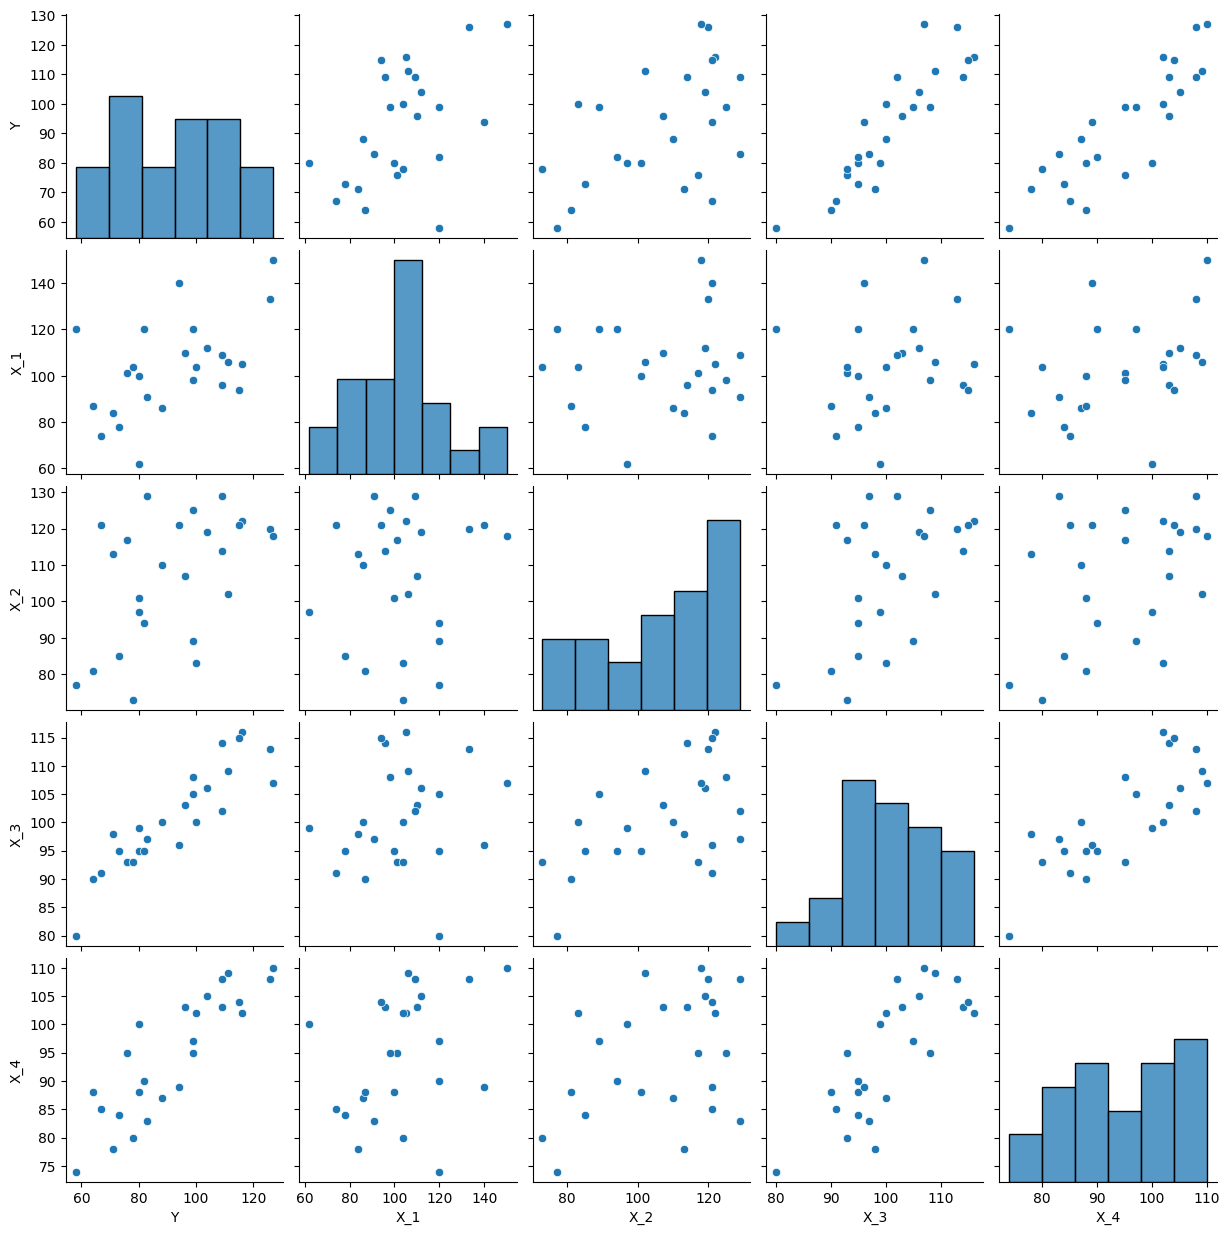

In [182]:
sns.pairplot(data)

<Axes: >

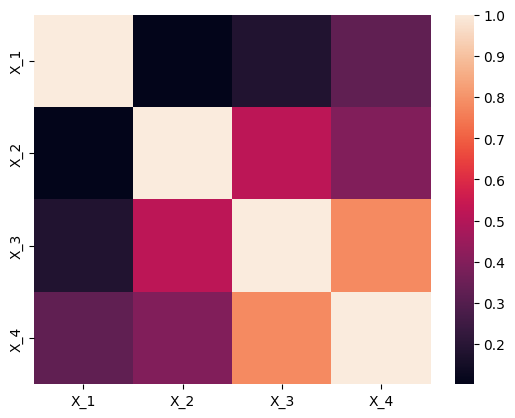

In [183]:
sns.heatmap(data[[x for x in data.columns if x != "Y"]].corr())

In [184]:
model_all_vars = smf.ols(formula="Y ~ X_1 + X_2 + X_3 + X_4", data=data).fit()

In [185]:
model_all_vars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.26e-14
Time:                        19:29:44   Log-Likelihood:                -67.951
No. Observations:                  25   AIC:                             145.9
Df Residuals:                      20   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.3818      9.941    -12.512      0.000    -145.119    -103.645
X_1            0.2957      0.044      6.725      0.000       0.204       0.387
X_2            0.0483      0.057      0.853      0.404      -0.070       0.166
X_3            1.3060      0.164      7.959      0.000       0.964       1.648
X_4            0.5198      0.132      3.940      0.001       0.245       0.795
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                1.419
Skew:                           0.139   Prob(JB):                        0.492
Kurtosis:                       1.867   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 9.11 Question

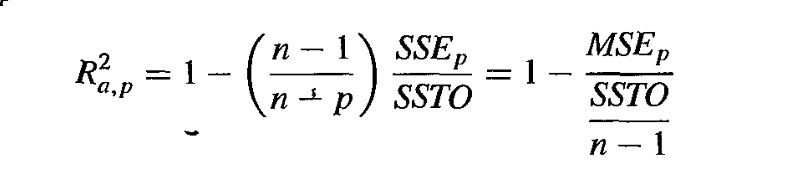

SSTO = SSE_1 

In [186]:
pool_potential_x_vars = [x for x in list(data.columns) if x != "Y"]
constant_model = smf.ols(formula="Y ~ 1 ", data=data ).fit()
SSTO = np.sum(constant_model.resid**2)
def get_r_squared_adjusted_p(model, predictors):
  p = len(predictors) + 1
  n = len(data)
  SSE_p = np.sum(model.resid**2) 
  return 1 - ((n-1)/(n-p))*(SSE_p/SSTO) 


In [187]:
from itertools import combinations

model_results = []

# Test all possible combinations of predictor variables (from 1 to 4 predictors)
for i in range(1, len(pool_potential_x_vars) + 1):
    for subset in combinations(pool_potential_x_vars, i):
        # Create formula for this subset
        formula = "Y ~ " + " + ".join(subset)
        
        # Fit the model
        model = smf.ols(formula=formula, data=data).fit()
        
        # Calculate adjusted R-squared
        r_squared_adj = get_r_squared_adjusted_p(model, subset)
        
        # Store results
        model_results.append({
            'predictors': subset,
            'formula': formula,
            'r_squared_adj': r_squared_adj,
            'num_predictors': len(subset)
        })

# Sort models by adjusted R-squared in descending order
sorted_models = sorted(model_results, key=lambda x: x['r_squared_adj'], reverse=True)

# Print the four best subset regression models
print("Four best subset regression models according to Ra,p criterion:")
for i, model in enumerate(sorted_models[:4]):
    print(f"Rank {i+1}: {model['formula']}, Ra,p = {model['r_squared_adj']:.4f}, "
          f"Number of predictors: {model['num_predictors']}")

Four best subset regression models according to Ra,p criterion:
Rank 1: Y ~ X_1 + X_3 + X_4, Ra,p = 0.9560, Number of predictors: 3
Rank 2: Y ~ X_1 + X_2 + X_3 + X_4, Ra,p = 0.9555, Number of predictors: 4
Rank 3: Y ~ X_1 + X_3, Ra,p = 0.9269, Number of predictors: 2
Rank 4: Y ~ X_1 + X_2 + X_3, Ra,p = 0.9247, Number of predictors: 3


## 9.16 question

In [188]:
data2 = pd.read_csv('Chapter  9 Data Sets/CH09PR15.txt',  header=None, sep='\s+')

In [189]:
data2.rename({0:"Y", 1: "X_1", 2: "X_2", 3: "X_3"}, axis='columns', inplace=True)

In [190]:
data2.head()

,Y,X_1,X_2,X_3
0,132.0,0.71,38.0,71.0
1,53.0,1.48,78.0,69.0
2,50.0,2.21,69.0,85.0
3,82.0,1.43,70.0,100.0
4,110.0,0.68,45.0,59.0


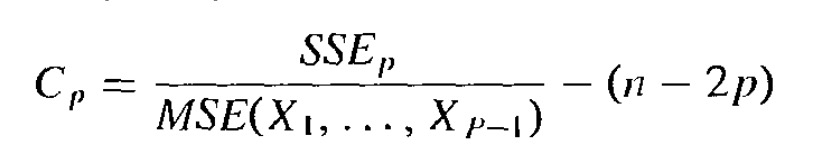

In [ ]:
full_model = smf.ols(formula="Y ~ X_1*X_2 + X_1*X_3 + X_2*X_3 + I(X_1**2) + I(X_2**2)+I(X_3**2)", data=data2).fit()
pool = ["X_1", "X_2", "X_3", "X_1:X_2", "X_1:X_3", "X_2:X_3", "I(X_1**2)", "I(X_2**2)", "I(X_3**2)"]
def calculate_C_p(subset_model, predictors, full_model, data):
    SSE_p = np.sum(subset_model.resid**2)
    
    p = len(predictors) + 1 
    
    n = len(data)
  
    n_full = len(data)
    p_full = len(pool) + 1  
    MSE = np.sum(full_model.resid**2) / (n_full - p_full)
    
    C_p = (SSE_p / MSE) - (n - 2 * p)
    
    return C_p

In [201]:
def find_best_hierarchical_models(data, response_var, full_model):
    # Define the first-order terms
    first_order = ["X_1", "X_2", "X_3"]
    
    # Initialize a list to store results
    results = []
    
    # For each possible subset of first-order terms (1 through 3)
    for i in range(1, len(first_order) + 1):
        for subset in combinations(first_order, i):
            base_terms = list(subset)
            
            # Create all possible models by adding second-order terms as appropriate
            # For a hierarchical model, we can only include second-order terms if 
            # their corresponding first-order terms are included
            
            # Potential cross-product terms based on included first-order terms
            cross_terms = []
            for j in range(len(base_terms)):
                for k in range(j+1, len(base_terms)):
                    cross_terms.append(f"{base_terms[j]}:{base_terms[k]}")
            
            # Potential quadratic terms based on included first-order terms
            quad_terms = [f"I({term}**2)" for term in base_terms]
            
            # Generate all possible combinations of second-order terms
            all_possible_second_order = []
            for j in range(len(cross_terms) + len(quad_terms) + 1):
                all_second_order = cross_terms + quad_terms
                for second_order_subset in combinations(all_second_order, j):
                    all_possible_second_order.append(list(second_order_subset))
            
            # For each combination of second-order terms, create and evaluate the model
            for second_order_terms in all_possible_second_order:
                predictors = base_terms + second_order_terms
                
                # Construct formula string: "Y ~ X_1 + X_2 + X_1:X_2 + I(X_1**2) + ..."
                formula = f"{response_var} ~ " + " + ".join(predictors)
                
                # Fit the model using formula API
                model = smf.ols(formula=formula, data=data).fit()
                
                # Calculate Cp
                cp = calculate_C_p(model, predictors, full_model, data)
                
                # Store the results
                results.append({
                    'predictors': predictors,
                    'formula': formula,
                    'Cp': cp,
                    'p': len(predictors) + 1  # +1 for intercept
                })
    
    # Sort by Cp (ascending)
    results.sort(key=lambda x: x['Cp'])
    
    # Return the three best models
    return results[:3]

# Assuming 'data2' has the dataset and 'Y' is the response variable
# The full_model is already defined
best_models = find_best_hierarchical_models(data2, 'Y', full_model)

# Display the results
print("The three best hierarchical subset regression models according to Cp:")
for i, model in enumerate(best_models, 1):
    print(f"\nModel {i}:")
    print(f"Formula: {model['formula']}")
    print(f"Predictors: {model['predictors']}")
    print(f"Cp value: {model['Cp']:.4f}")
    print(f"Number of parameters (p): {model['p']}")

# Answer for part b: Check if there's much difference in Cp values
cp_values = [model['Cp'] for model in best_models]
max_diff = max(cp_values) - min(cp_values)
print(f"\nPart b: Difference in Cp between best and third best model: {max_diff:.4f}")

The three best hierarchical subset regression models according to Cp:

Model 1:
Formula: Y ~ X_1 + X_2 + X_3 + X_1:X_2
Predictors: ['X_1', 'X_2', 'X_3', 'X_1:X_2']
Cp value: 3.3022
Number of parameters (p): 5

Model 2:
Formula: Y ~ X_1 + X_2 + X_3 + X_1:X_2 + I(X_3**2)
Predictors: ['X_1', 'X_2', 'X_3', 'X_1:X_2', 'I(X_3**2)']
Cp value: 3.3850
Number of parameters (p): 6

Model 3:
Formula: Y ~ X_1 + X_2 + X_3 + X_1:X_2 + I(X_2**2)
Predictors: ['X_1', 'X_2', 'X_3', 'X_1:X_2', 'I(X_2**2)']
Cp value: 4.4480
Number of parameters (p): 6

Part b: Difference in Cp between best and third best model: 1.1458


## Question 9.20

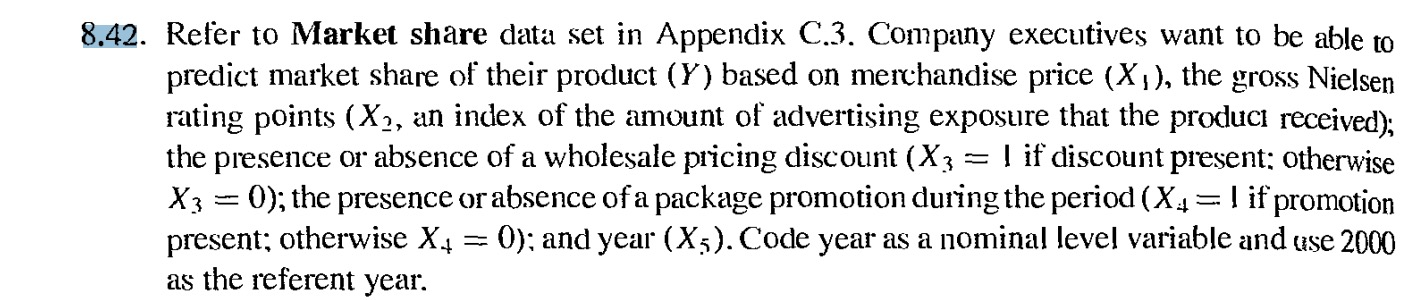

In [106]:
data_3 = pd.read_csv('Chapter  9 Data Sets/APPENC03.txt',  header=None, sep='\s+')
data_3.rename({1: "Y", 2: "X_1", 3: "X_2", 4: "X_3", 5: "X_4", 7: "X_5"}, axis='columns', inplace=True)
data_3.drop([0,6], axis="columns", inplace=True)

In [107]:
def forward_stepwise_regression(data, response, predictors, alpha_enter=0.05, alpha_remove=0.10):
    """
    Perform forward stepwise regression.
    
    Parameters:
    - data: DataFrame containing all variables
    - response: Name of response variable (Y)
    - predictors: List of predictor variable names
    - alpha_enter: Critical threshold for adding a variable
    - alpha_remove: Critical threshold for removing a variable
    
    Returns:
    - Best model and the sequence of selected variables
    """
    current_predictors = []
    remaining_predictors = predictors.copy()
    history = []
    
    # Start with intercept-only model
    best_model = smf.ols(formula=f"{response} ~ 1", data=data).fit()
    print(f"Starting with intercept-only model: AIC = {best_model.aic:.4f}")
    
    step = 1
    while remaining_predictors:
        print(f"\nIteration {step}: Testing addition of variables")
        
        # Try adding each remaining predictor
        best_pvalue = float('inf')
        best_predictor = None
        candidate_model = None
        
        for predictor in remaining_predictors:
            # Create formula with current predictors plus the candidate
            formula = f"{response} ~ " + " + ".join(current_predictors + [predictor])
            model = smf.ols(formula=formula, data=data).fit()
            
            # Get p-value for the newly added predictor
            p_values = model.pvalues
            new_predictor_pvalue = p_values[predictor]
            
            print(f"  Testing {predictor}: p-value = {new_predictor_pvalue:.4f}")
            
            # If this predictor has the lowest p-value so far and it's below alpha_enter
            if new_predictor_pvalue < best_pvalue and new_predictor_pvalue < alpha_enter:
                best_pvalue = new_predictor_pvalue
                best_predictor = predictor
                candidate_model = model
        
        # If we found a predictor to add
        if best_predictor:
            print(f"  Adding {best_predictor} with p-value = {best_pvalue:.4f}")
            current_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            best_model = candidate_model
            history.append((step, "add", best_predictor, best_pvalue))
            
            # Check if any variable should be removed
            # Only done after we have at least 2 predictors
            if len(current_predictors) > 1:
                print("  Checking if any variables should be removed...")
                remove_predictor = None
                highest_pvalue = 0
                
                for predictor in current_predictors:
                    predictor_pvalue = best_model.pvalues[predictor]
                    
                    if predictor_pvalue > alpha_remove and predictor_pvalue > highest_pvalue:
                        highest_pvalue = predictor_pvalue
                        remove_predictor = predictor
                
                if remove_predictor:
                    print(f"  Removing {remove_predictor} with p-value = {highest_pvalue:.4f}")
                    current_predictors.remove(remove_predictor)
                    remaining_predictors.append(remove_predictor)
                    
                    # Refit model without the removed predictor
                    formula = f"{response} ~ " + " + ".join(current_predictors)
                    best_model = smf.ols(formula=formula, data=data).fit()
                    history.append((step, "remove", remove_predictor, highest_pvalue))
        else:
            # No more predictors to add
            print("  No more variables meet the criteria for entry.")
            break
            
        # Print current model summary
        print(f"\nCurrent model after iteration {step}:")
        print(f"  Formula: {response} ~ " + " + ".join(current_predictors))
        print(f"  AIC: {best_model.aic:.4f}")
        print(f"  R-squared: {best_model.rsquared:.4f}")
        print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
        
        step += 1
    
    print("\nFinal model:")
    print(f"  Formula: {response} ~ " + " + ".join(current_predictors))
    print(f"  AIC: {best_model.aic:.4f}")
    print(f"  R-squared: {best_model.rsquared:.4f}")
    print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
    
    return best_model, history

# Run the stepwise regression
response = 'Y'  # job proficiency
predictors = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5']
alpha_enter = 0.10  # threshold for adding variables
alpha_remove = 0.15  # threshold for removing variables

best_model, history = forward_stepwise_regression(data_3, response, predictors, alpha_enter, alpha_remove)

# Print parameter estimates for the final model
print("\nParameter Estimates:")
print(best_model.summary().tables[1])

# Print history of variable additions and removals
print("\nVariable Selection History:")
for step, action, var, pvalue in history:
    print(f"Step {step}: {action.capitalize()} {var} (p-value: {pvalue:.4f})")

Starting with intercept-only model: AIC = 7.3610

Iteration 1: Testing addition of variables
  Testing X_1: p-value = 0.2709
  Testing X_2: p-value = 0.6741
  Testing X_3: p-value = 0.0000
  Testing X_4: p-value = 0.0705
  Testing X_5: p-value = 0.7616
  Adding X_3 with p-value = 0.0000

Current model after iteration 1:
  Formula: Y ~ X_3
  AIC: -25.9733
  R-squared: 0.6253
  Adjusted R-squared: 0.6142

Iteration 2: Testing addition of variables
  Testing X_1: p-value = 0.0832
  Testing X_2: p-value = 0.2194
  Testing X_4: p-value = 0.0734
  Testing X_5: p-value = 0.0590
  Adding X_5 with p-value = 0.0590
  Checking if any variables should be removed...

Current model after iteration 2:
  Formula: Y ~ X_3 + X_5
  AIC: -27.9230
  R-squared: 0.6642
  Adjusted R-squared: 0.6438

Iteration 3: Testing addition of variables
  Testing X_1: p-value = 0.3415
  Testing X_2: p-value = 0.7505
  Testing X_4: p-value = 0.0582
  Adding X_4 with p-value = 0.0582
  Checking if any variables should be r

In [120]:
optimal_model_stepwise = smf.ols(formula="Y ~ X_1+ X_3 + X_4 ", data=data_3).fit()

In [123]:
optimal_model_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     25.68
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.19e-08
Time:                        17:46:46   Log-Likelihood:                 19.386
No. Observations:                  36   AIC:                            -30.77
Df Residuals:                      32   BIC:                            -24.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1853      0.365      8.726      0.000       2.442       3.929
X_1           -0.3527      0.157     -2.241      0.032      -0.673      -0.032
X_3            0.3991      0.051      7.787      0.000       0.295       0.504
X_4            0.1180      0.051      2.292      0.029       0.013       0.223
==============================================================================
Omnibus:                        2.072   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.287
Skew:                          -0.152   Prob(JB):                        0.526
Kurtosis:                       2.125   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

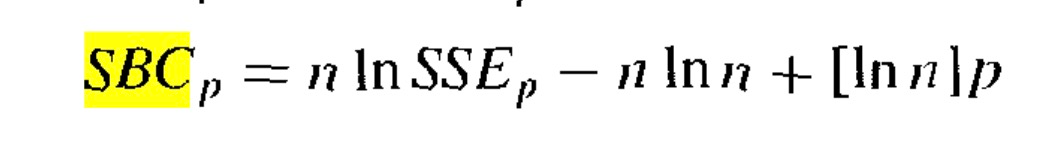

In [124]:
# best subset criterion by SBC_p criterion
n = len(data_3)
num_predictors = 4
SBCp = n*np.log(np.sum(optimal_model_stepwise.resid**2))- n*np.log(n) + (np.log(n))*num_predictors
SBCp

np.float64(-126.60121625527114)

## Question 9.21 

In [ ]:
model_all_vars = smf.ols(formula="Y ~ X_1 + X_2 + X_3 + X_4", data=data).fit()

In [72]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Assuming your data is already in a DataFrame called 'data'
# with columns 'Y', 'X_1', 'X_2', 'X_3', 'X_4'

def forward_stepwise_regression(data, response, predictors, alpha_enter=0.05, alpha_remove=0.10):
    """
    Perform forward stepwise regression.
    
    Parameters:
    - data: DataFrame containing all variables
    - response: Name of response variable (Y)
    - predictors: List of predictor variable names
    - alpha_enter: Critical threshold for adding a variable
    - alpha_remove: Critical threshold for removing a variable
    
    Returns:
    - Best model and the sequence of selected variables
    """
    current_predictors = []
    remaining_predictors = predictors.copy()
    history = []
    
    # Start with intercept-only model
    best_model = smf.ols(formula=f"{response} ~ 1", data=data).fit()
    print(f"Starting with intercept-only model: AIC = {best_model.aic:.4f}")
    
    step = 1
    while remaining_predictors:
        print(f"\nIteration {step}: Testing addition of variables")
        
        # Try adding each remaining predictor
        best_pvalue = float('inf')
        best_predictor = None
        candidate_model = None
        
        for predictor in remaining_predictors:
            # Create formula with current predictors plus the candidate
            formula = f"{response} ~ " + " + ".join(current_predictors + [predictor])
            model = smf.ols(formula=formula, data=data).fit()
            
            # Get p-value for the newly added predictor
            p_values = model.pvalues
            new_predictor_pvalue = p_values[predictor]
            
            print(f"  Testing {predictor}: p-value = {new_predictor_pvalue:.4f}")
            
            # If this predictor has the lowest p-value so far and it's below alpha_enter
            if new_predictor_pvalue < best_pvalue and new_predictor_pvalue < alpha_enter:
                best_pvalue = new_predictor_pvalue
                best_predictor = predictor
                candidate_model = model
        
        # If we found a predictor to add
        if best_predictor:
            print(f"  Adding {best_predictor} with p-value = {best_pvalue:.4f}")
            current_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            best_model = candidate_model
            history.append((step, "add", best_predictor, best_pvalue))
            
            # Check if any variable should be removed
            # Only done after we have at least 2 predictors
            if len(current_predictors) > 1:
                print("  Checking if any variables should be removed...")
                remove_predictor = None
                highest_pvalue = 0
                
                for predictor in current_predictors:
                    predictor_pvalue = best_model.pvalues[predictor]
                    
                    if predictor_pvalue > alpha_remove and predictor_pvalue > highest_pvalue:
                        highest_pvalue = predictor_pvalue
                        remove_predictor = predictor
                
                if remove_predictor:
                    print(f"  Removing {remove_predictor} with p-value = {highest_pvalue:.4f}")
                    current_predictors.remove(remove_predictor)
                    remaining_predictors.append(remove_predictor)
                    
                    # Refit model without the removed predictor
                    formula = f"{response} ~ " + " + ".join(current_predictors)
                    best_model = smf.ols(formula=formula, data=data).fit()
                    history.append((step, "remove", remove_predictor, highest_pvalue))
        else:
            # No more predictors to add
            print("  No more variables meet the criteria for entry.")
            break
            
        # Print current model summary
        print(f"\nCurrent model after iteration {step}:")
        print(f"  Formula: {response} ~ " + " + ".join(current_predictors))
        print(f"  AIC: {best_model.aic:.4f}")
        print(f"  R-squared: {best_model.rsquared:.4f}")
        print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
        
        step += 1
    
    print("\nFinal model:")
    print(f"  Formula: {response} ~ " + " + ".join(current_predictors))
    print(f"  AIC: {best_model.aic:.4f}")
    print(f"  R-squared: {best_model.rsquared:.4f}")
    print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
    
    return best_model, history

# Run the stepwise regression
response = 'Y'  # job proficiency
predictors = ['X_1', 'X_2', 'X_3', 'X_4']
alpha_enter = 0.05  # threshold for adding variables
alpha_remove = 0.10  # threshold for removing variables

best_model, history = forward_stepwise_regression(data, response, predictors, alpha_enter, alpha_remove)

# Print parameter estimates for the final model
print("\nParameter Estimates:")
print(best_model.summary().tables[1])

# Print history of variable additions and removals
print("\nVariable Selection History:")
for step, action, var, pvalue in history:
    print(f"Step {step}: {action.capitalize()} {var} (p-value: {pvalue:.4f})")

Starting with intercept-only model: AIC = 220.2491

Iteration 1: Testing addition of variables
  Testing X_1: p-value = 0.0085
  Testing X_2: p-value = 0.0115
  Testing X_3: p-value = 0.0000
  Testing X_4: p-value = 0.0000
  Adding X_3 with p-value = 0.0000

Current model after iteration 1:
  Formula: Y ~ X_3
  AIC: 181.4155
  R-squared: 0.8047
  Adjusted R-squared: 0.7962

Iteration 2: Testing addition of variables
  Testing X_1: p-value = 0.0000
  Testing X_2: p-value = 0.6995
  Testing X_4: p-value = 0.0016
  Adding X_1 with p-value = 0.0000
  Checking if any variables should be removed...

Current model after iteration 2:
  Formula: Y ~ X_3 + X_1
  AIC: 156.6741
  R-squared: 0.9330
  Adjusted R-squared: 0.9269

Iteration 3: Testing addition of variables
  Testing X_2: p-value = 0.5606
  Testing X_4: p-value = 0.0007
  Adding X_4 with p-value = 0.0007
  Checking if any variables should be removed...

Current model after iteration 3:
  Formula: Y ~ X_3 + X_1 + X_4
  AIC: 144.7942
  R

In [73]:
final_model = smf.ols(formula="Y ~ X_1 + X_3 + X_4", data=data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.16e-15
Time:                        14:34:27   Log-Likelihood:                -68.397
No. Observations:                  25   AIC:                             144.8
Df Residuals:                      21   BIC:                             149.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.2000      9.874    -12.578      0.000    -144.734    -103.666
X_1            0.2963      0.044      6.784      0.000       0.205       0.387
X_3            1.3570      0.152      8.937      0.000       1.041       1.673
X_4            0.5174      0.131      3.948      0.001       0.245       0.790
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.314
Skew:                           0.154   Prob(JB):                        0.519
Kurtosis:                       1.920   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sum = 0 
for i in range(len(data)): 
  data_i = data.copy()
  data_i.drop(i, axis='rows', inplace=True)
  y_hat = smf.ols(formula="Y ~ X_1 + X_3 + X_4", data=data_i).fit()
  i_features = data.iloc[i, 1:]
  y_hat_i = float(y_hat.predict(i_features).iloc[0])
  true_y = data.iloc[i, 0]
  sum += (true_y - y_hat_i)**2

print(f"The press statistic is: {sum}")

The press statistic is: 471.45197756957646


In [95]:

print(f"The sum of squares error is: {np.sum(final_model.resid**2)}")

The sum of squares error is: 348.19700765899853
